
# Exploratory Data Analysis


## Libraries & Data Importation

In [0]:
import pyspark
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

In [0]:
CATALOG = "workspace"
SCHEMA = "safe_driver_prediction"

train_df = spark.read.table(f"{CATALOG}.{SCHEMA}.train")
test_df = spark.read.table(f"{CATALOG}.{SCHEMA}.test")

print(f"train set has {train_df.count()} rows and {len(train_df.columns)} columns.")
print(f"test set has {test_df.count()} rows and {len(test_df.columns)} columns.")

train set has 595212 rows and 59 columns.
test set has 892816 rows and 58 columns.


In [0]:
train_df.limit(10).display()


id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
863026,0,0,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.2,0.1,-1.0,6,1,-1,0,1,15,1,1,0,1,5,2,0.44721359549999995,1.1285549892,0.4,3.4641016150999997,0.2,0.4,0.0,2,2,8,3,11,3,11,7,2,2,11,0,1,1,0,0,0
863030,1,1,2,1,0,0,1,0,0,0,0,0,0,0,0,8,0,1,0,0.7,0.9,1.9031224343000002,11,1,-1,0,-1,0,1,1,1,1,78,3,0.4,0.7979959403,0.38483762810000005,3.3166247904,0.4,0.3,0.8,2,4,8,4,8,2,9,6,1,2,5,0,1,0,0,1,0
863031,0,0,1,7,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.3,0.2,-1.0,5,1,0,0,0,0,1,1,2,1,95,2,0.399374511,0.6440605947,0.3322649545,2.0,0.1,0.0,0.0,2,2,8,4,10,4,7,2,3,2,10,1,1,0,0,0,0
863033,0,1,3,8,1,0,0,0,0,1,0,0,0,0,0,3,1,0,0,0.9,1.2,0.6025985397,11,0,1,0,1,7,1,1,2,1,79,3,0.4,1.0048230797,0.3466987165,3.6055512755000003,0.6,0.6,0.0,0,1,8,4,10,3,9,2,4,3,10,0,0,1,1,0,0
863034,0,5,2,1,1,0,0,0,1,0,0,0,0,0,0,6,0,1,0,0.9,1.2,1.6678953803999998,11,1,0,0,1,1,1,1,2,1,70,3,0.3741657387,0.7491041481999999,0.33911649920000003,3.0,0.5,0.3,0.4,2,2,8,3,10,4,8,5,2,2,6,0,1,1,0,0,0
863036,0,7,1,3,1,0,0,0,0,1,0,0,0,0,0,7,1,0,0,0.9,0.5,0.9093266740000001,6,1,-1,0,1,1,1,1,0,1,64,1,0.316227766,0.6621246793,0.3701351105,2.8284271247,0.2,0.2,0.3,4,2,7,2,10,1,11,3,0,0,5,0,0,0,0,0,0
863039,0,0,2,6,1,0,0,1,0,0,0,0,0,0,0,5,1,0,0,0.1,0.1,-1.0,7,1,-1,0,-1,1,1,1,2,1,25,3,0.3741657387,0.7942848543000001,-1.0,3.6055512755000003,0.5,0.9,0.2,3,3,8,3,7,5,14,4,2,0,9,0,1,0,1,1,0
863040,0,1,3,6,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0.5,0.2,0.6694213918999999,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316227766,0.7445775051000001,0.36851051549999997,3.4641016150999997,0.4,0.8,0.9,3,4,8,2,9,1,10,3,3,3,3,0,1,0,0,0,0
863043,0,0,2,1,0,0,0,1,0,0,0,0,0,0,0,6,1,0,0,0.4,0.0,0.5273755777,11,0,1,9,1,2,-1,0,1,1,104,3,0.44721359549999995,1.6885614200999999,0.4669047012,3.7416573868,0.1,0.5,0.1,0,0,8,3,11,2,8,1,0,1,14,0,1,1,0,1,1
863044,0,0,1,5,0,0,1,0,0,0,0,0,0,0,0,10,1,0,0,0.3,0.2,-1.0,10,1,-1,0,1,11,1,1,0,1,103,1,0.316227766,0.5818892002,0.3583294573,2.8284271247,0.0,0.2,0.1,1,3,8,3,8,4,9,6,1,2,11,0,1,0,0,0,0



## Data Type Checks

In [0]:
train_df = train_df.toPandas()
test_df = test_df.toPandas()

In [0]:
train_df.columns = train_df.columns.str.replace('ps_', '', regex=False)
test_df.columns = test_df.columns.str.replace('ps_', '', regex=False)

In [0]:

columns = train_df.columns

print("categorical features: \n", [col for col in columns if "_cat" in col])
print("--------------------------------------")
print("binary features: \n", [col for col in columns if "_bin" in col])

print("--------------------------------------")
print("--------------------------------------")

print("vehicle features: \n", [col for col in columns if "car_" in col])
print("--------------------------------------")
print("indicator features: \n", [col for col in columns if "ind_" in col])
print("--------------------------------------")
print("regular features: \n", [col for col in columns if "reg_" in col])
print("--------------------------------------")
print("calculated features: \n", [col for col in columns if "calc_" in col])
print("--------------------------------------")

categorical features: 
 ['ind_02_cat', 'ind_04_cat', 'ind_05_cat', 'car_01_cat', 'car_02_cat', 'car_03_cat', 'car_04_cat', 'car_05_cat', 'car_06_cat', 'car_07_cat', 'car_08_cat', 'car_09_cat', 'car_10_cat', 'car_11_cat']
--------------------------------------
binary features: 
 ['ind_06_bin', 'ind_07_bin', 'ind_08_bin', 'ind_09_bin', 'ind_10_bin', 'ind_11_bin', 'ind_12_bin', 'ind_13_bin', 'ind_16_bin', 'ind_17_bin', 'ind_18_bin', 'calc_15_bin', 'calc_16_bin', 'calc_17_bin', 'calc_18_bin', 'calc_19_bin', 'calc_20_bin']
--------------------------------------
--------------------------------------
vehicle features: 
 ['car_01_cat', 'car_02_cat', 'car_03_cat', 'car_04_cat', 'car_05_cat', 'car_06_cat', 'car_07_cat', 'car_08_cat', 'car_09_cat', 'car_10_cat', 'car_11_cat', 'car_11', 'car_12', 'car_13', 'car_14', 'car_15']
--------------------------------------
indicator features: 
 ['ind_01', 'ind_02_cat', 'ind_03', 'ind_04_cat', 'ind_05_cat', 'ind_06_bin', 'ind_07_bin', 'ind_08_bin', 'ind_09


## Distribution Plots

In [0]:
def plot_counts_per_feature(dataset: pd.DataFrame, feature_name: str):
    """
    Plot counts of unique values of a feature (only for categorical features).
    """
    plt.figure(figsize=(6,4))
    sns.countplot(
        x=feature_name, data=dataset, 
        palette='pastel', hue=feature_name, legend=False
    )
    plt.title(f'counts of unique values in "{feature_name}" column')
    plt.xlabel(feature_name)
    plt.ylabel('counts')
    plt.show()

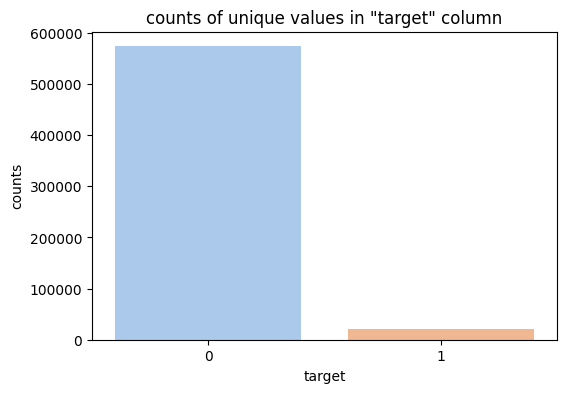

In [0]:
plot_counts_per_feature(
  dataset=train_df, 
  feature_name="target"
)

Now we can see there is huge imbalance towards positive class (clients with claims). We might deal with it in several methods (minority class oversampling, majority class undersampling, class weights, etc.)

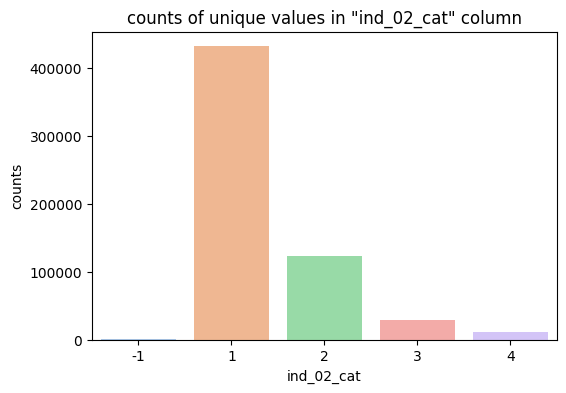

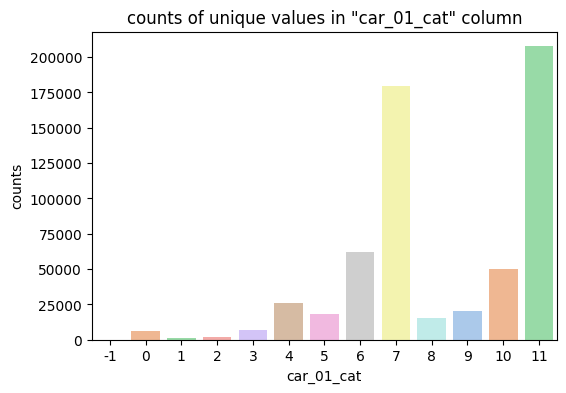

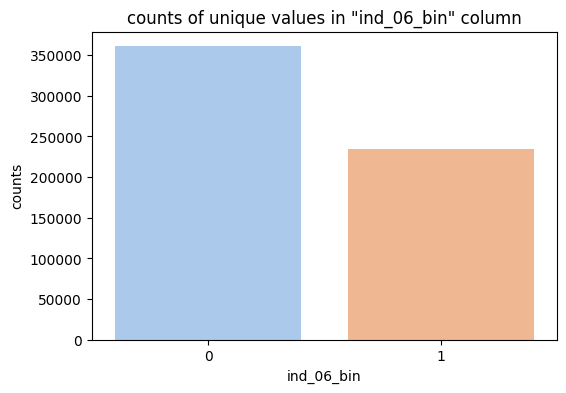

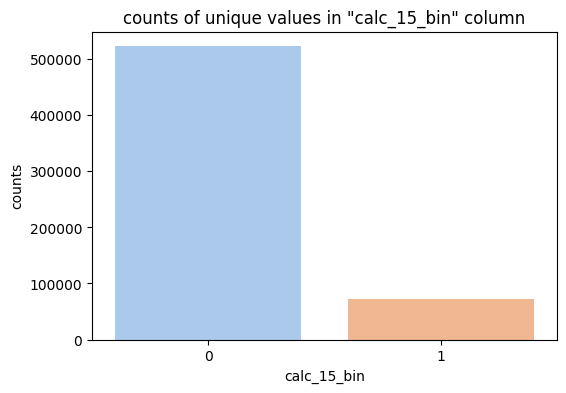

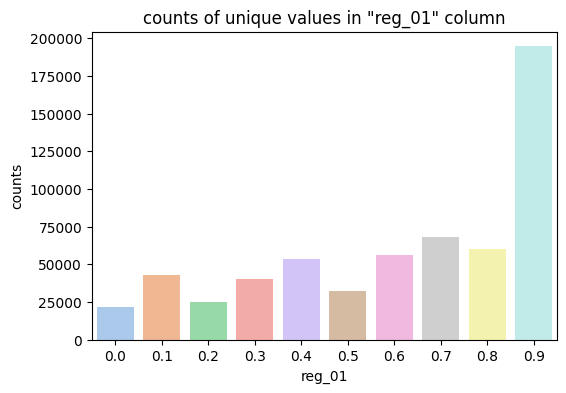

In [0]:
plot_counts_per_feature(
    dataset=train_df,
    feature_name="ind_02_cat"  # a categorical indicator feature
)

plot_counts_per_feature(
    dataset=train_df,
    feature_name="car_01_cat"  # a categorical vehicle feature
)

plot_counts_per_feature(
    dataset=train_df,
    feature_name="ind_06_bin"  # a binary indicator feature
)

plot_counts_per_feature(
    dataset=train_df,
    feature_name="calc_15_bin"  # a binary calculated feature
)

plot_counts_per_feature(
    dataset=train_df,
    feature_name="reg_01"  # a regular feature
)

In [0]:
def plot_box_distribution(train_set: pd.DataFrame,
                          test_set: pd.DataFrame,
                          feature_name: str, 
                          target_name: str
                          ) -> None:
    """
    Plot boxplot of the input feature (only for contiuous features)
    """
    # impute missing values (-1) with mean value for each dataset
    train_mean = train_set.loc[train_set[feature_name] != -1, feature_name].mean()
    train_set.loc[train_set[feature_name] == -1, feature_name] = train_mean
    test_mean = test_set.loc[test_set[feature_name] != -1, feature_name].mean()
    test_set.loc[test_set[feature_name] == -1, feature_name] = test_mean

    fig, axes = plt.subplots(1, 2, figsize=(9, 5), sharey=True)
    sns.boxplot(
      x=target_name, y=feature_name, data=train_set, whis=1.5,
      palette="pastel", hue=target_name, legend=False,
      ax=axes[0]
    )
    axes[0].set_title(f'Boxplot of {feature_name} by {target_name} (train)')
    axes[0].set_xlabel(target_name)
    axes[0].set_ylabel(feature_name)
    sns.boxplot(
      x=None, y=feature_name, data=test_set, whis=1.5,
      width=0.4, ax=axes[1]
    )
    axes[1].set_title(f'Boxplot of {feature_name} (test)')
    plt.tight_layout()
    plt.show()

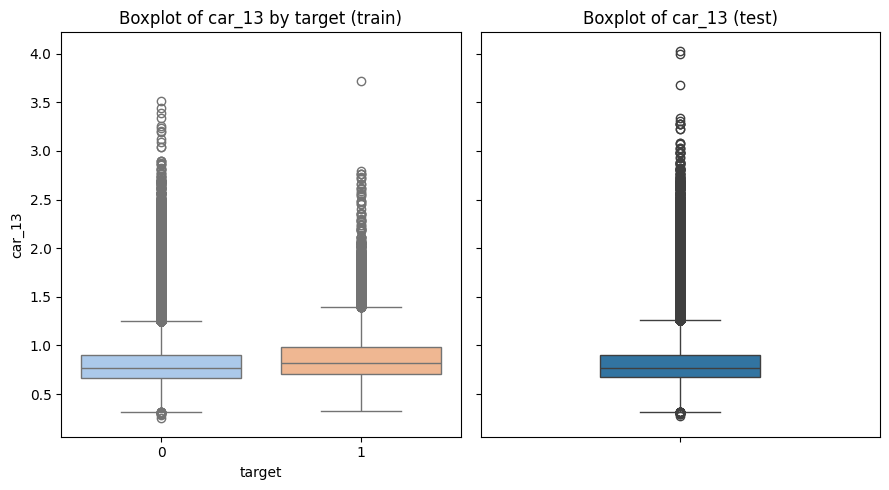

In [0]:
plot_box_distribution(
    train_set=train_df,
    test_set=test_df,
    feature_name="car_13",  # a continuous feature
    target_name="target"
)


### Analysis Report

- `car_03_cat`: ~70% nulls
- `car_04_cat`: eligible for super-group (0 vs non-0)
- `car_06_cat`: high cardinality (18 categories)
- `car_07_cat`: high class imbalance (~95%)
- `car_10_cat`: high class imbalance (>99%)
- `car_11_cat`: very high cardinality (104 categories) | eligible for super-group (104 vs non-104)
- `car_13`: right-tail skewness (lots of outliers)
- `ind_02_cat`: class imbalance (~70%) | eligible for super-group (1 vs non-1)
- `ind_05_cat`: class imbalance (~85%) | eligible for super-group (0 vs non-0)
- `ind_10_bin`: high class imbalance (>99%)
- `ind_11_bin`: high class imbalance (>99%)
- `ind_12_bin`: high class imbalance (>99%)
- `ind_13_bin`: high class imbalance (>99%)
- `ind_14`: high class imbalance (>99%)
- `ind_17_bin`: class imbalance (~85%)
- `ind_18_bin`: class imbalance (~80%)
- `reg_02`: right-tail skewness (lots of outliers)
- `calc_15_bin`: class imbalance (~85%)
- `calc_20_bin`: class imbalance (~80%)


## Inter-feature Correlation Map

In [0]:
corr_matrix = train_df.corr(method='spearman')  # set to spearman to catch subtle correlations

fig = px.imshow(
  img=corr_matrix,
  color_continuous_scale='RdBu_r',
  zmin=-1, zmax=1,
  labels=dict(x='Features', y='Features', color='Correlation'), 
  x=corr_matrix.columns, 
  y=corr_matrix.columns,
  text_auto=True
)

fig.update_layout(width=1000, height=1000, title="Interactive Correlation Heatmap")
fig.show()


## data quality checks

In [0]:
missing_counts = (train_df == -1).sum()
missing_percent = round((missing_counts / len(train_df)) * 100, 2)

missing_df = pd.DataFrame({
    'feature': missing_counts.index,
    'none_counts': missing_counts.values,
    'none_percentage': missing_percent.values
})

missing_df.sort_values(by='none_percentage', ascending=False).display()

feature,none_counts,none_percentage
car_03_cat,411231,69.09
car_05_cat,266551,44.78
reg_03,107772,18.11
car_14,42620,7.16
car_07_cat,11489,1.93
ind_05_cat,5809,0.98
car_09_cat,569,0.1
ind_02_cat,216,0.04
car_01_cat,107,0.02
ind_04_cat,83,0.01


In [0]:
def find_outliers(df: pd.DataFrame, threshold: float = 1.5) -> dict:
    """
    Find outliers in a given pandas dataframe using IQR method. This method
    should only be used for continuous numerical features
    """
    outlier_dict = {}
    for column in df.columns:
        if all(sub not in column for sub in ['id', 'target', '_cat', '_bin']):
            pass
        else:
            continue
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (threshold * iqr)
        upper_bound = q3 + (threshold * iqr)
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        outlier_dict[column] = outliers
        print(f"{column}: num outliers = {len(outliers)} | {round(len(outliers)/len(df)*100, 2)}%")

    return outlier_dict


_ = find_outliers(df=train_df, threshold=1.5)

ind_01: num outliers = 0 | 0.0%
ind_03: num outliers = 0 | 0.0%
ind_14: num outliers = 6380 | 1.07%
ind_15: num outliers = 0 | 0.0%
reg_01: num outliers = 0 | 0.0%
reg_02: num outliers = 36793 | 6.18%
reg_03: num outliers = 120865 | 20.31%
car_11: num outliers = 25988 | 4.37%
car_12: num outliers = 15356 | 2.58%
car_13: num outliers = 26913 | 4.52%
car_14: num outliers = 58905 | 9.9%
car_15: num outliers = 27409 | 4.6%
calc_01: num outliers = 0 | 0.0%
calc_02: num outliers = 0 | 0.0%
calc_03: num outliers = 0 | 0.0%
calc_04: num outliers = 38105 | 6.4%
calc_05: num outliers = 0 | 0.0%
calc_06: num outliers = 1338 | 0.22%
calc_07: num outliers = 570 | 0.1%
calc_08: num outliers = 942 | 0.16%
calc_09: num outliers = 263 | 0.04%
calc_10: num outliers = 3642 | 0.61%
calc_11: num outliers = 6080 | 1.02%
calc_12: num outliers = 35259 | 5.92%
calc_13: num outliers = 5505 | 0.92%
calc_14: num outliers = 16086 | 2.7%
